<a href="https://colab.research.google.com/github/Deonatan/PathFindingAlgorithm/blob/main/MazeProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Finish coordinate: 47 , 1

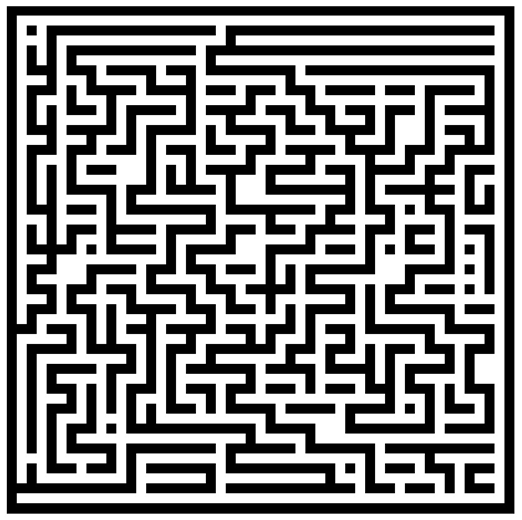

Input x coordinate: 2
Input y coordinate: 3
The path has been found!
The coordinate walkthrough:  [(2, 3), (3, 3), (3, 2), (3, 1), (2, 1), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (2, 21), (3, 21), (3, 20), (3, 19), (4, 19), (5, 19), (6, 19), (7, 19), (8, 19), (9, 19), (10, 19), (11, 19), (12, 19), (13, 19), (14, 19), (15, 19), (16, 19), (17, 19), (17, 20), (17, 21), (18, 21), (19, 21), (20, 21), (21, 21), (22, 21), (23, 21), (23, 20), (23, 19), (23, 18), (23, 17), (24, 17), (25, 17), (26, 17), (27, 17), (27, 18), (27, 19), (28, 19), (29, 19), (29, 20), (29, 21), (30, 21), (31, 21), (32, 21), (33, 21), (33, 20), (33, 19), (34, 19), (35, 19), (35, 18), (35, 17), (36, 17), (37, 17), (38, 17), (39, 17), (39, 18), (39, 19), (40, 19), (41, 19), (41, 18), (41, 17), (41, 16), (41, 15), (40, 15), (39, 15), (38, 15), (37, 15), (36, 15), (35, 15), (34, 15), (

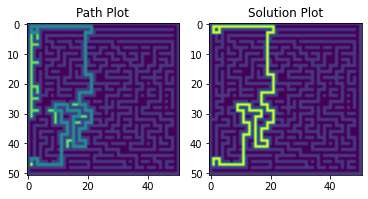

In [ ]:
#handling the import error 
try:
  import numpy as np 
  import matplotlib.pyplot as plt 
  file = open("/content/drive/My Drive/mazefile.txt","r") 
except ImportError:
  print("Your Interpreter or Compiler doesn't support the modules required!") 
except FileNotFoundError:
  print("The file name inserted couldn't be found!")

#creating the maze array
mazearray=[]
for paths in file.readlines(): 
        if eval(paths):
            mazearray.append(1)# 1 indicate a wall 
        else:
            mazearray.append(0)# 0 indicate empty path (available to explore) 
        
dimension=(51,51)#come from the sqrt of 2601 
plot=np.transpose(np.array(mazearray).reshape(dimension)) #final clean plot 
maze=np.transpose(np.array(mazearray).reshape(dimension)) #workings maze 
end_x, end_y = 47 ,1 
maze[end_x][end_y]= 6 #endpoint the number set is also associated with the color
verify="verified"
#create the list for the overall path , movement , and the path of the maze
allPath,movement = list(), list()

#check whether the input is a wall or not.
def validate(x,y):
  global verify #set the verify variable as a global so we can alter the value. 
  verify="verified"
  if maze[x][y]==1:
      print("The coordinate selected is a wall. Please select another coordinate.")
      verify="unverified"

def find(x,y):
    allPath.append((x,y))
    if maze[x][y]==6:
        print("The path has been found!")
    elif maze[x+1][y] == 0 or maze[x+1][y]==6:#down
        maze[x][y]= 3
        find(x+1,y)
    elif maze[x][y-1] == 0:#left
        maze[x][y]= 3
        find(x,y-1)
    elif maze[x][y+1] == 0:#right
        maze[x][y]= 3
        find(x,y+1)
    elif maze[x-1][y] == 0:#up
        maze[x][y]=3
        find(x-1,y)
    else :#Handling the situation if the program stuck in the end. 
        maze[x][y] = 5
        allPath.remove((x,y)) # remove the coordinates of the dead end
        if maze[x-1][y] == 3: #up 
            find(x-1,y)
        elif maze[x][y+1] == 3:#right
            find(x,y+1)
        elif maze[x][y-1] == 3: #left
            find(x,y-1)
        elif maze[x+1][y] == 3:#down
            find(x+1,y) 

#simplify function : remove the duplicate path that exist on the overall path. 
def simplify(x,y):
    for coordinate in allPath:
        if movement.count(coordinate)>0:
            for duplicate in range(len(movement)-1,movement.index(coordinate)-1,-1):
                movement.pop(duplicate)
        movement.append(coordinate) 

def printplot(c): #set the value of the plot.
    for (a,b) in movement:
        plot[a][b]=c 

def visual(pic1,pic2):
  fig,picture = plt.subplots(1,2) 
  picture[0].imshow(pic1)
  picture[0].title.set_text("Path Plot")
  picture[1].imshow(pic2)
  picture[1].title.set_text("Solution Plot")

def solution():
    while True:
      try:
        x,y=int(input("Input x coordinate: ")),int(input("Input y coordinate: "))
        if 0<=x<=51 and 0<=y<=51:
          break 
        else:
          print("input coordinate out of range")
          continue
      except ValueError:
        print("Please enter positive integer within 0 and 51") 
    validate(x,y)
    if verify=="verified":
      find(x,y) 
      simplify(x,y)
      print("The coordinate walkthrough: " , movement) 
      printplot(6)
      visual(maze,plot) 
    else:
      solution()

solution()